# 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。  
ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。  
$$
g(z) = \frac{1}{1+e^{−z}}.
$$
線形回帰の仮定関数は次の式でした。
$$
h_\theta(x) = \theta^T \cdot x.
$$
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
$$
h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}.
$$
$x$: 特徴量ベクトル
$\theta$: パラメータ（重み）ベクトル

以下のメソッドをScratchLogisticRegresstionに実装した。
```python
def _logistic_hypothesis(self, X):
    """
    ロジスティック回帰の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      ロジスティック回帰の仮定関数による推定結果
    """
    net_input = np.dot(X, self.coef_)
    return 1. / (1. + np.exp(-np.clip(net_input, -250, 250)))
```

# 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。  
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。  
$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\<br/>\frac{\partial J(\theta)}{\partial 
\theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\<br/>\frac{\partial J(\theta)}{\partial 
\theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$
$\alpha$: : 学習率  
$i$: サンプルのインデックス  
$j$: 特徴量のインデックス  
$m$: 入力されるデータの数  
$h_\theta()$: 仮定関数  
$x$: 特徴量ベクトル  
$\theta$: パラメータ（重み）ベクトル  
$x^{(i)}$: i番目のサンプルの特徴量ベクトル  
$y^{(i)}$: i番目のサンプルの正解ラベル  
$\theta_j$: j番目のパラメータ（重み）  
$λ$: 正則化パラメータ

以下のメソッドをScratchLogisticRegresstionに実装した。  
```python
    def _gradient_descent(self, X, errors):
        """
        最急降下法により重みとバイアスの更新を行う
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        errors : 次の形のndarray, shape (n_samples,)
          目的変数から予測値を引いたもの
        """
        self.coef_ -= self.lr * np.dot(errors.T, X) / X.shape[0] + self.coef_ / (self.C*X.shape[0])
        
        if self.no_bias == False:
            self.coef_[0] -= self.lr * errors.sum() / X.shape[0]
 ```

# 【問題3】推定

推定する仕組みを実装してください。  
ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。  
仮定関数$h_\theta(x)$の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

以下のメソッドをScratchLogisticRegresstionに実装した。  
```python
def predict(self, X):
    """
    ロジスティック回帰を使いラベルを推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    if self.no_bias == False:
        X = np.insert(X,0,1,axis=1)
    return np.where(self._logistic_hypothesis(X) >= 0.5, 1, 0)

def predict_proba(self, X):
    """
    ロジスティック回帰を使い確率を推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        ロジスティック回帰による推定結果
    """
    if self.no_bias == False:
        X = np.insert(X,0,1,axis=1)
    return self._logistic_hypothesis(X)
```

# 【問題4】目的関数

以下の数式で表されるロジスティック回帰の **目的関数（損失関数）** を実装してください。  
そして、これをself.loss, self.val_lossに記録するようにしてください。  
なお、この数式には正則化項が含まれています。  
$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$$
$m$: 入力されるデータの数  
$h_\theta()$: 仮定関数  
$x$: 特徴量ベクトル  
$\theta$: パラメータ（重み）ベクトル  
$x^{(i)}$: i番目のサンプルの特徴量ベクトル  
$y^{(i)}$: i番目のサンプルの正解ラベル  
$\theta_j$: j番目のパラメータ（重み）  
$n$: 特徴量の数  
$λ$: 正則化パラメータ

以下のメソッドをScratchLogisticRegresstionに実装した。  
```python
def _calc_loss(self, X, y):
    """
    クロスエントロピー損失関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
      訓練データの正解値
    """
    loss_term1 = -y*np.log(self._logistic_hypothesis(X))
    loss_term2 = (1-y) * np.log(1 - self._logistic_hypothesis(X))
    regularization = np.dot(self.coef_, self.coef_) / (2*self.C*X.shape[0])
    loss = np.sum(loss_term1 - loss_term2) + regularization
    return loss

# 目的関数を求めて、self.lossに格納
self.loss[i] = self._calc_loss(X, y)
# 検証データについて、目的関数を求める
if (X_val is not None) and (y_val is not None):
    self.val_loss[i] = self._calc_loss(X_val, y_val)
```

# 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。  
scikit-learnによる実装と比べ、正しく動いているかを確認してください。  
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, C, random_state=1, no_bias=False, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.C = C
        self.no_bias = no_bias
        self.verbose = verbose
        self.random_state = random_state
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    def _logistic_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          ロジスティック回帰の仮定関数による推定結果
        """
        net_input = np.dot(X, self.coef_)
        return 1. / (1. + np.exp(-np.clip(net_input, -250, 250)))
    
    def _gradient_descent(self, X, errors):
        """
        最急降下法により重みとバイアスの更新を行う
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        errors : 次の形のndarray, shape (n_samples,)
          目的変数から予測値を引いたもの
        """
        self.coef_ -= self.lr * np.dot(errors.T, X) / X.shape[0] + self.coef_ / (self.C*X.shape[0])
        
        if self.no_bias == False:
            self.coef_[0] -= self.lr * errors.sum() / X.shape[0]
    
    def _calc_loss(self, X, y):
        """
        クロスエントロピー損失関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, )
          訓練データの正解値
        """
        loss_term1 = -y*np.log(self._logistic_hypothesis(X))
        loss_term2 = (1-y) * np.log(1 - self._logistic_hypothesis(X))
        regularization = np.dot(self.coef_, self.coef_) / (2*self.C*X.shape[0])
        loss = np.sum(loss_term1 - loss_term2) + regularization
        return loss
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.no_bias == False:
            X = np.insert(X,0,1,axis=1)
            if X_val is not None:
                X_val = np.insert(X_val,0,1,axis=1)
                
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=(X.shape[1]))
        
        for i in range(self.iter):
            # 仮定関数を求める
            output = self._logistic_hypothesis(X)
            # 誤差を求める
            errors = output - y
            # 最急降下法による重み、バイアスの更新
            self._gradient_descent(X, errors)
            # 目的関数を求めて、self.lossに格納
            self.loss[i] = self._calc_loss(X, y)
            # 検証データについて、目的関数を求める
            if (X_val is not None) and (y_val is not None):
                self.val_loss[i] = self._calc_loss(X_val, y_val)
                
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("num_iter : {}, loss = {}".format(i, self.loss[i]))
            
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.no_bias == False:
            X = np.insert(X,0,1,axis=1)
        return np.where(self._logistic_hypothesis(X) >= 0.5, 1, 0)
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.no_bias == False:
            X = np.insert(X,0,1,axis=1)
        return self._logistic_hypothesis(X)

In [3]:
def evaluate(y_true, y_pred):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

In [4]:
# データ読み込み
iris = datasets.load_iris()
X = iris.data[50:, :][:, 0:2]
y = iris.target[50:]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [5]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# ラベルを0, 1に変換
y_train = y_train - 1
y_test = y_test - 1

In [6]:
# scratch ロジスティック回帰を使用
lr1 = ScratchLogisticRegression(num_iter=500, lr=0.01, C=10, random_state=42, no_bias=False, verbose=False)
lr1.fit(X_train_std, y_train, X_test_std, y_test)
y_pred_lr = lr1.predict(X_test_std)

In [7]:
print('y_pred_lr = {}'.format(y_pred_lr))
print('y_test = {}'.format(y_test))

print("Accuracy : {:.3f}\nPrecision : {:.3f}\nRecall : {:.3f}\nF1 : {:.3f}\nconfusion matrix \n {}\n"
          .format(*evaluate(y_test, y_pred_lr)))

y_pred_lr = [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
y_test = [1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
Accuracy : 0.650
Precision : 1.000
Recall : 0.300
F1 : 0.462
confusion matrix 
 [[10  0]
 [ 7  3]]



In [8]:
# sklearn ロジスティック回帰を使用
sgd = SGDClassifier(loss="log")
sgd.fit(X_train_std, y_train)
y_pred_sgd = sgd.predict(X_test_std)

In [9]:
print('y_pred_sgd = {}'.format(y_pred_sgd))
print('y_test = {}'.format(y_test))

print("Accuracy : {:.3f}\nPrecision : {:.3f}\nRecall : {:.3f}\nF1 : {:.3f}\nconfusion matrix \n {}\n"
          .format(*evaluate(y_test, y_pred_sgd)))

y_pred_sgd = [1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0]
y_test = [1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]
Accuracy : 0.600
Precision : 0.750
Recall : 0.300
F1 : 0.429
confusion matrix 
 [[9 1]
 [7 3]]



# 【問題6】学習曲線のプロット

学習曲線を見て損失が適切に下がっているかどうか確認してください。

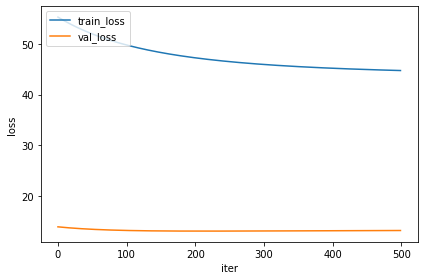

In [10]:
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(lr1.loss, label='train_loss')
plt.plot(lr1.val_loss, label='val_loss')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 【問題7】決定領域の可視化

決定領域を可視化してください。

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

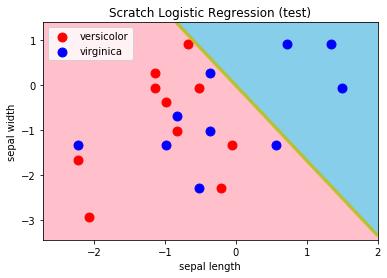

In [12]:
decision_region(X_test_std, y_test, lr1, title="Scratch Logistic Regression (test)",
                xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])

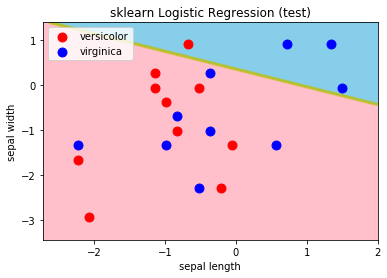

In [13]:
decision_region(X_test_std, y_test, sgd, title="sklearn Logistic Regression (test)",
                xlabel='sepal length', ylabel='sepal width', target_names=['versicolor', 'virginica'])